In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [4]:
pd.options.display.float_format = '{:.1f}'.format

In [5]:
merge = pd.read_csv("merge.csv", encoding='cp949')
corona = pd.read_csv("Corona.csv")

In [13]:
merge['base_date'] = pd.to_datetime(merge['base_date'])
corona['Date'] = pd.to_datetime(corona['Date'])

In [14]:
# 일병 코로나 확진자수 포함 데이터
merge1 = merge.groupby(['base_date']).sum().reset_index()
merge1 = merge1.merge(corona, left_on=['base_date'], right_on=['Date'])
merge1 = merge1.drop(['Date'], axis=1)

In [15]:
merge

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_북아메리카_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_아프리카_visit_pop_cnt,longtermfrgn_오세아니아_visit_pop_cnt,longtermfrgn_유럽_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_북아메리카_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,longtermfrgn_아프리카_resd_pop_cnt,longtermfrgn_오세아니아_resd_pop_cnt,longtermfrgn_유럽_resd_pop_cnt,shorttermfrgn_기타_visit_pop_cnt,shorttermfrgn_북아메리카_visit_pop_cnt,shorttermfrgn_아시아_visit_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2018-01-01,건입동,1708250,170069.3,18974.3,182005.7,66.0,199.5,4389.1,0.0,0.0,123.3,4.0,0.0,4471.0,0.0,0.0,0.0,258.9,2.0,4516.4,79,34,589,5,152,44,49,10,93,751,0
1,2018-01-01,남원읍,1239600,284458.2,17722.5,213841.0,34.4,51.2,2025.4,0.0,53.5,30.8,0.0,7.3,6943.4,0.0,0.0,0.0,626.0,86.0,2840.4,108,54,466,25,295,34,15,5,93,481,5
2,2018-01-01,노형동,9357900,1171497.7,71832.9,424610.4,117.7,322.5,10850.0,0.0,135.2,45.5,476.9,1927.8,40893.5,0.0,197.0,427.3,808.3,80.1,8765.7,1007,216,4905,123,943,363,236,54,987,3658,15
3,2018-01-01,대륜동,1717700,264716.0,19962.1,208720.9,74.6,459.3,2145.8,0.0,11.9,18.9,210.6,725.9,1720.2,0.0,205.6,93.5,221.9,5.9,1119.3,128,29,859,20,142,64,34,15,167,574,0
4,2018-01-01,대정읍,1264950,363105.9,15910.2,154216.8,155.1,618.5,3992.3,0.0,67.6,384.4,453.0,3600.0,16733.6,0.0,426.2,1100.6,171.7,0.0,1816.3,137,44,864,34,74,69,79,0,137,535,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48393,2021-06-30,표선면,1333000,239284.4,23521.0,158051.6,57.3,516.2,2546.3,0.0,0.0,194.7,137.6,123.5,3722.4,0.0,0.0,0.0,81.3,2.8,5.8,60,35,423,75,236,20,35,10,45,397,0
48394,2021-06-30,한경면,973850,167417.9,16029.6,98566.2,177.7,740.8,4370.9,0.0,88.1,165.5,197.8,467.7,5301.0,0.0,213.4,492.7,6.9,5.5,0.0,80,20,423,40,241,40,25,5,70,342,0
48395,2021-06-30,한림읍,3298100,470485.0,49193.1,286951.2,395.6,985.8,12591.4,0.0,427.6,378.1,283.8,1039.8,23002.8,0.0,23.2,185.4,27.3,21.2,24.5,136,80,669,257,599,106,80,0,166,946,5
48396,2021-06-30,화북동,3749600,572500.6,50152.6,241048.4,154.8,172.9,1885.7,0.0,4.6,10.1,258.0,355.8,5436.4,119.8,0.0,26.7,0.0,42.4,1.4,362,352,1645,644,513,146,50,15,282,1635,0


<AxesSubplot:>

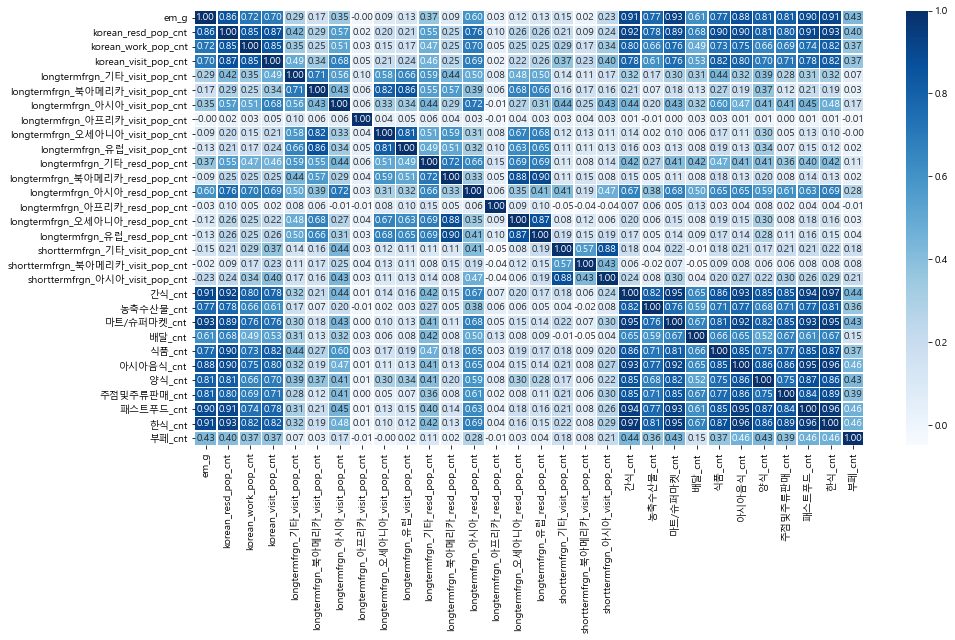

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data=merge.drop(['base_date', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

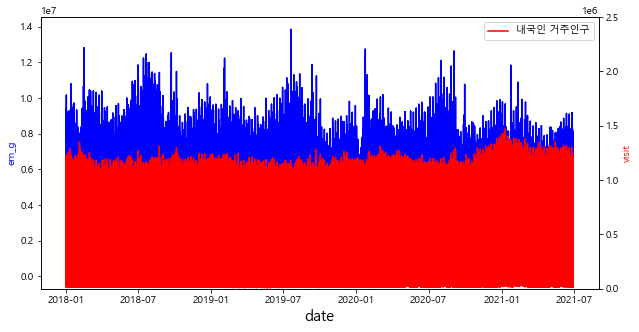

In [33]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(merge['base_date'], merge['em_g'], color = 'blue', label = '음식물 쓰레기')
ax.set_xlabel('date', fontsize = 15)
ax.set_ylabel('em_g', color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2 = ax.twinx()
ax2.plot(merge['base_date'], merge['korean_resd_pop_cnt'], color = 'red', label = '내국인 거주인구')
ax2.set_ylabel('visit', color='red')
plt.ylim([0, 2500000])

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

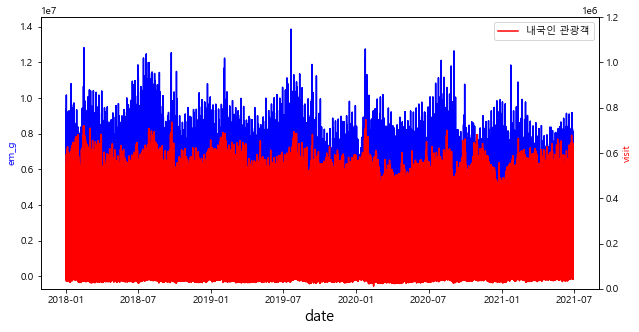

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(merge['base_date'], merge['em_g'], color = 'blue', label = '음식물 쓰레기')
ax.set_xlabel('date', fontsize = 15)
ax.set_ylabel('em_g', color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2 = ax.twinx()
ax2.plot(merge['base_date'], merge['korean_visit_pop_cnt'], color = 'red', label = '내국인 관광객')
ax2.set_ylabel('visit', color='red')
plt.ylim([0, 1200000])

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

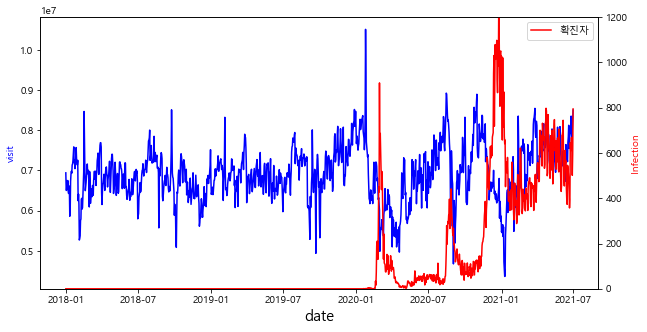

In [35]:
fig2 = plt.figure(figsize=(10,5))
ax = fig2.add_subplot(1, 1, 1)
ax.plot(merge1['base_date'], merge1['korean_visit_pop_cnt'], color = 'blue', label = '내국인 관광객')
ax.set_xlabel('date', fontsize = 15)
ax.set_ylabel('visit', color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2 = ax.twinx()
ax2.plot(merge1['base_date'], merge1['Infection'], color = 'red', label = '확진자')
ax2.set_ylabel('Infection', color='red')
plt.ylim([0, 1200])

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

예상했던 대로 관광객 수가 이미 코로나 확진자 현황을 어느 정도 잘 반영하고 있는 것으로 보임

In [36]:
merge['resd'] = merge['korean_resd_pop_cnt'] + merge['longtermfrgn_기타_resd_pop_cnt'] + merge['longtermfrgn_북아메리카_resd_pop_cnt'] + merge['longtermfrgn_아시아_resd_pop_cnt'] + merge['longtermfrgn_아프리카_resd_pop_cnt'] + merge['longtermfrgn_오세아니아_resd_pop_cnt'] + merge['longtermfrgn_유럽_resd_pop_cnt']
merge['visit'] = merge['korean_visit_pop_cnt'] + merge['longtermfrgn_기타_visit_pop_cnt'] + merge['longtermfrgn_북아메리카_visit_pop_cnt'] + merge['longtermfrgn_아시아_visit_pop_cnt'] + merge['longtermfrgn_아프리카_visit_pop_cnt'] + merge['longtermfrgn_오세아니아_visit_pop_cnt'] + merge['longtermfrgn_유럽_visit_pop_cnt'] + merge['shorttermfrgn_기타_visit_pop_cnt'] + merge['shorttermfrgn_북아메리카_visit_pop_cnt'] + merge['shorttermfrgn_아시아_visit_pop_cnt']

In [37]:
merge['em_g per resd'] = merge['em_g'] / merge['resd']
merge['em_g per visit'] = merge['em_g'] / merge['visit']

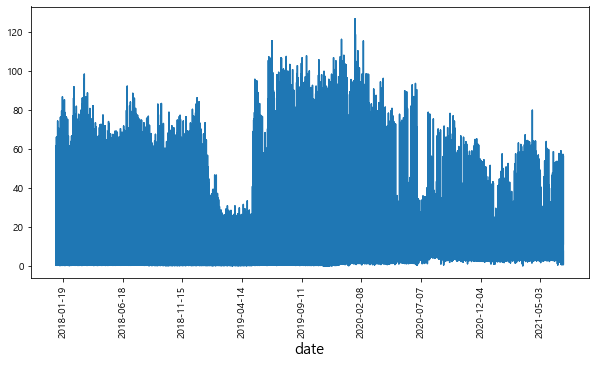

In [38]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(merge['base_date'], merge['em_g per resd'])
ax.set_xlabel('date', fontsize = 15)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation='vertical')
plt.show()

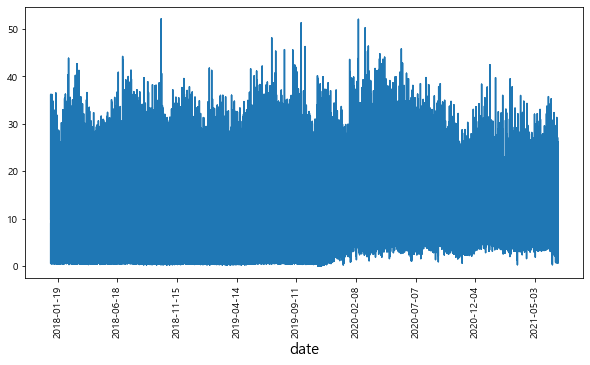

In [39]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(merge['base_date'], merge['em_g per visit'])
ax.set_xlabel('date', fontsize = 15)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation='vertical')
plt.show()

거주자 대비 음식물 쓰레기 양은 줄어드는 추세이나 관광객 수 대비 음식물 쓰레기 양은 비슷
-> 관광객들을 상대로 한 대책 필요(논리의 흐름이 적절한지 잘 모르겠음)

=> 관련 교육, 추가 비용

- 실제 신혼여행지로 유명한 몰디브는 2015년 11월부터 관광객에게 하루 6달러의 환경세를 받아 리조트 시설에서 나오는 폐기물을 처리하는 데 사용
- 인도 케랄라주는 관광객 차량당 출입 시 입도세를 부과
- 스페인 발레아레스주는 숙박요금에 관광객별 세금을 부과하는 숙박세(Eco Tax)를 도입

시사적 관점
- 관광산업이 핵심전략산업인 제주지역 식당에서는 푸짐한 상차림 선호 + 반찬 재사용 금지
=> 소형, 복합 찬기 보급

- 음식물쓰레기 발생비율 중 가장 많은 비중을 차지하고 있는 부분은 유통, 조리 과정
=> 식재료의 신선함 유지, 그 방안으로 유통과정 또는 시간을 줄이거나 음식물 저장기간을 연장하는 방법

- 또한 현재 발생되는 음식물쓰레기에서 음폐수는 약 70~80%를 차지하는 것으로 나타남
=> 음식물분리수거용기 사용 장려 및 음식물쓰레기 배출 시 수분 제거 필요

- 강제적인 방법으로는 누진세 적용
=> 그러나 반발 심할듯?